In [45]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

In [46]:
# save the dataset without outliers

df = pd.read_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\trekantenEMA01_outlier_removal.csv', delimiter=';')
df = df.drop(['Unnamed: 0'], axis=1)

df.tail()

,Time,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,temperature_c1.1,temperature_c1.2,temperature_c1.3,temperature_c1.4,temperature_c2.1,...,exp_valve_c2,superheat_c1,superheat_c2,water_flow_SS1,temperature_TS1_SS1,temperature_TS2_SS1,pressure_t1.c1,pressure_t2.c1,pressure_t1_c2,pressure_t2.c2
875456,2021-08-30 23:56:00,9.2,9.1,33.6,33.9,32.4,30.4,28.9,14.2,57.6,...,0.0,4.6,1.5,0.0,0.0,31.1,19.8,9.6,9.4,9.3
875457,2021-08-30 23:57:00,9.8,9.7,33.6,33.6,32.4,30.4,28.9,14.2,55.3,...,0.0,4.2,1.1,0.0,0.0,31.1,19.9,9.8,9.7,9.6
875458,2021-08-30 23:58:00,10.6,10.4,33.6,33.6,32.4,30.6,28.9,14.2,53.5,...,0.0,3.8,0.9,0.0,0.0,31.1,19.8,10.1,9.9,9.8
875459,2021-08-30 23:59:00,10.9,10.9,33.6,33.6,32.1,30.6,28.9,14.4,51.5,...,0.0,3.4,1.1,0.0,0.0,31.1,19.9,10.1,9.9,9.8
875460,2021-08-31 00:00:00,11.2,11.2,33.6,33.6,32.1,30.6,28.9,14.4,50.0,...,0.0,3.3,1.1,0.0,0.0,31.1,20.0,10.3,10.2,9.8


In [47]:
n = df.isna().sum()
print(n)

Time                       0
temperature_cs1_c1     21873
temperature_cs1_c2     23551
temperature_HS1_c1     18639
temperature_HS1_c2     15813
temperature_c1.1       13867
temperature_c1.2       15797
temperature_c1.3       13730
temperature_c1.4       14361
temperature_c2.1       13335
temperature_c2.2       14176
temperature_c2.3       13866
temperature_c2.4       14061
C1a                    42819
C1b                    42719
C2a                    14490
C2b                    13587
water_flow_c2          17219
water_flow_c1          13596
exp_valve_c1           48244
exp_valve_c2           22124
superheat_c1           17253
superheat_c2           13471
water_flow_SS1         13500
temperature_TS1_SS1    42662
temperature_TS2_SS1    17681
pressure_t1.c1         29699
pressure_t2.c1         16324
pressure_t1_c2         13484
pressure_t2.c2         29141
dtype: int64


In [48]:
df_filter = df[~(df['Time'] > '2021-07-01 00:00:00')]

print(df_filter)

                       Time  temperature_cs1_c1  temperature_cs1_c2  \
0       2020-01-01 00:00:00                 4.6                 7.3   
1       2020-01-01 00:01:00                 4.6                 7.3   
2       2020-01-01 00:02:00                 4.6                 7.3   
3       2020-01-01 00:03:00                 4.6                 7.3   
4       2020-01-01 00:04:00                 4.6                 7.3   
...                     ...                 ...                 ...   
787616  2021-06-30 23:56:00                 9.8                12.3   
787617  2021-06-30 23:57:00                 9.4                11.9   
787618  2021-06-30 23:58:00                 8.9                11.4   
787619  2021-06-30 23:59:00                 8.3                10.7   
787620  2021-07-01 00:00:00                 7.1                 9.6   

        temperature_HS1_c1  temperature_HS1_c2  temperature_c1.1  \
0                     37.7                43.1         85.900000   
1          

In [ ]:
n_filter = df_filter.isna().sum()
print(n_filter)

In [ ]:
# create function to interpolate and plot
def interpolate_and_plot(series, interpolation):
    # create a boolean mask for missing values
    missing_values = series.isna()

    # interpolate the missing values
    series_interp = series.interpolate(interpolation)

    # plot the results, highlighting the interpolation values
    fig, ax = plt.subplots(figsize=(20,16))
    series_interp.plot(color = 'grey', alpha = 0.3, ax=ax, legend=False);

    # note plot the interpolated values on top in pink
    series_interp[missing_values].plot(ax=ax, color='pink', linewidth = 2, legend=False);

# interpolate using the latest non-missing value # interpolation_type = 'zero'
inteprolation_type = 'linear' 
data_interp = interpolate_and_plot(df_filter, inteprolation_type)


In [49]:
df = df_filter.drop(['Time'], axis=1)

In [ ]:
df.tail()

In [ ]:
def replace_outliers(series):
    ## Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
   # Calculate a mask for the difference that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series)*3)

    # Replace these values with value from the previous cell 
    series[this_mask] = series.fillna(method = 'ffill', inplace=True)
    return series

# Apply your preprocessing functino to the timeseries and plot the results
data_new = df.apply(replace_outliers)
data_new.hist(figsize=(20, 16), bins=50, xlabelsize=8, ylabelsize=8)

array([[<AxesSubplot:title={'center':'temperature_cs1_c1'}>,
        <AxesSubplot:title={'center':'temperature_cs1_c2'}>,
        <AxesSubplot:title={'center':'temperature_HS1_c1'}>,
        <AxesSubplot:title={'center':'temperature_HS1_c2'}>,
        <AxesSubplot:title={'center':'temperature_c1.1'}>],
       [<AxesSubplot:title={'center':'temperature_c1.2'}>,
        <AxesSubplot:title={'center':'temperature_c1.3'}>,
        <AxesSubplot:title={'center':'temperature_c1.4'}>,
        <AxesSubplot:title={'center':'temperature_c2.1'}>,
        <AxesSubplot:title={'center':'temperature_c2.2'}>],
       [<AxesSubplot:title={'center':'temperature_c2.3'}>,
        <AxesSubplot:title={'center':'temperature_c2.4'}>,
        <AxesSubplot:title={'center':'C1a'}>,
        <AxesSubplot:title={'center':'C1b'}>,
        <AxesSubplot:title={'center':'C2a'}>],
       [<AxesSubplot:title={'center':'C2b'}>,
        <AxesSubplot:title={'center':'water_flow_c2'}>,
        <AxesSubplot:title={'center':'wat

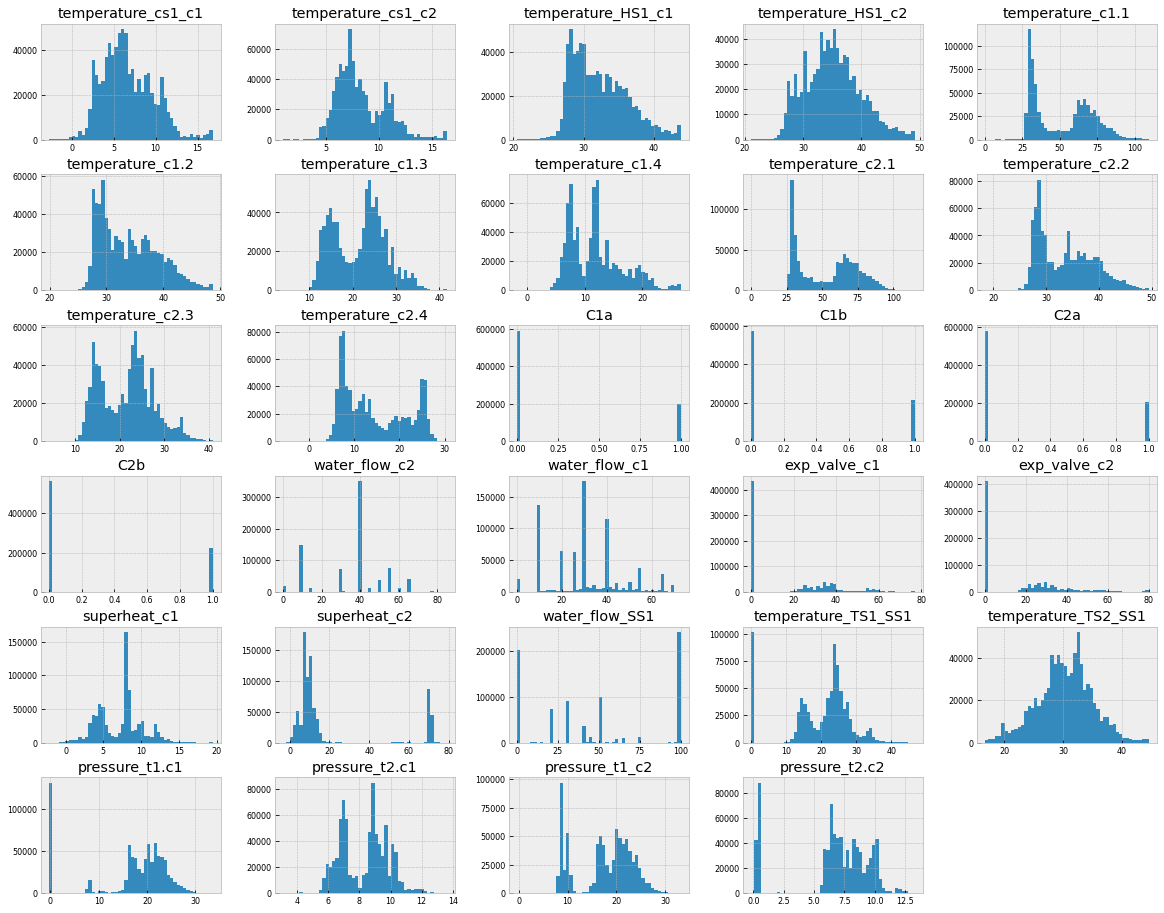

In [53]:
# Replace these values with value from the previous cell 
data_ffill = df.fillna(method = 'ffill')
a = data_ffill.describe()
b = pd.DataFrame(a)

data_ffill.hist(figsize=(20, 16), bins=50, xlabelsize=8, ylabelsize=8)

In [54]:
print(data_ffill.isna().sum())
#data_new.describe()

temperature_cs1_c1     0
temperature_cs1_c2     0
temperature_HS1_c1     0
temperature_HS1_c2     0
temperature_c1.1       0
temperature_c1.2       0
temperature_c1.3       0
temperature_c1.4       0
temperature_c2.1       0
temperature_c2.2       0
temperature_c2.3       0
temperature_c2.4       0
C1a                    0
C1b                    0
C2a                    0
C2b                    0
water_flow_c2          0
water_flow_c1          0
exp_valve_c1           0
exp_valve_c2           0
superheat_c1           0
superheat_c2           0
water_flow_SS1         0
temperature_TS1_SS1    0
temperature_TS2_SS1    0
pressure_t1.c1         0
pressure_t2.c1         0
pressure_t1_c2         0
pressure_t2.c2         0
dtype: int64


In [ ]:
# filling up gaps with interpolation
## it can also be done with simulations

#df = data.interpolate(method='polynomial', order = 2)

#print(df.isna().sum())

#df.describe()

In [ ]:
# identification of missing data NaN
n_nan = data_new.isna().sum()
#n_nan.to_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\nan.csv', sep=';')
print(n_nan)

na = data_new.isna()
nan_all = pd.DataFrame(na)
#nan_all.to_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\nan_all.csv', sep=';')

from matplotlib.ticker import FixedFormatter, FixedLocator

# df_temperature

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(nan_all['temperature_cs1.2_c1'], color = 'aquamarine')
ax.plot(nan_all['temperature_cs1.2_c2'], color = 'chartreuse')
ax.plot(nan_all['temperature_HS1.1_c1'], color = 'goldenrod')
ax.plot(nan_all['temperature_HS1.1_c2'], color = 'orange')
ax.plot(nan_all['temperature_c1.1'], color = 'darkgreen')
ax.plot(nan_all['temperature_c1.2'], color = 'forestgreen')
ax.plot(nan_all['temperature_c1.3'], color = 'springgreen')
ax.plot(nan_all['temperature_c1.4'], color = 'lightgreen')
ax.plot(nan_all['temperature_c2.1'], color = 'khaki')
ax.plot(nan_all['temperature_c2.2'], color = 'gold')
ax.plot(nan_all['temperature_c2.3'], color = 'moccasin')
ax.plot(nan_all['temperature_c2.4'], color = 'yellow')
ax.plot(nan_all['C1a'], color = 'tan', linewidth= 0.6, alpha = 0.3)#, linewidth= 0.5)
ax.plot(nan_all['C1b'], color = 'wheat', linewidth= 0.5, alpha = 0.3)#, linewidth= 0.5)
ax.plot(nan_all['C2a'], color = 'darkolivegreen', linewidth= 0.4, alpha = 0.3)#, linestyle ='--', alpha = 0.3, linewidth= 0.5)
ax.plot(nan_all['C2b'], color = 'olive', linewidth= 0.3, alpha = 0.3)#, alpha = 0.5, linewidth= 0.4)
ax.plot(nan_all['water_flow_c2'], color = 'turquoise', linewidth= 1.3, linestyle = '--')#, linewidth = 0.3, alpha = 0.5)
ax.plot(nan_all['water_flow_c1'], color = 'skyblue', linewidth= 1.2, linestyle = '--')#, linestyle = '--', alpha = 0.4)
ax.plot(nan_all['exp_valve_c1'], color = 'darkgrey', linewidth= 1.1, linestyle = '--')
ax.plot(nan_all['exp_valve_c2'], color = 'lightslategrey', linewidth= 1.4, linestyle = '--')#, linestyle = '--', alpha = 0.3)
ax.plot(nan_all['superheat_c1'], color = 'darksalmon', linestyle = '--')
ax.plot(nan_all['superheat_c2'], color = 'lightpink', linestyle = '--')

x_locator = FixedLocator([50, 140031, 349862, 547220, 658707, 875460])
x_formatter = FixedFormatter(['Jan 2020', 'April 2020', 'Sept 2020', 'Jan 2021', 'April 2021', 'Sept 2021'])
ax.xaxis.set_major_locator(x_locator)
ax.xaxis.set_major_formatter(x_formatter)

y_locator = FixedLocator([0, 1])
y_formatter = FixedFormatter(['FALSE', 'TRUE'])
ax.yaxis.set_major_locator(y_locator)
ax.yaxis.set_major_formatter(y_formatter)

plt.xlabel('Date')
plt.ylabel('Is this a NaN?')
plt.title('NaN location')
ax.legend(loc = 'best', labels=['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2','temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3', 'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3', 'temperature_c2.4', 'C1a', 'C1b', 'C2a', 'C2b', 'water_flow_circuit 2', 'water_flow_HS1', 'exp_valve_circuit1', 'exp_valve_circuit2', 'superheat_c1', 'superheat_c2' ])

plt.show()

In [ ]:
# test with dataset
data_new1 = data_new[540000:]

from matplotlib.ticker import FixedFormatter, FixedLocator

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(data_new1['superheat_c1'], color = 'darksalmon', linestyle = '--')
ax.plot(data_new1['superheat_c2'], color = 'lightpink',  alpha=0.3)

#x_locator = FixedLocator([50, 140031, 349862, 547220, 658707, 875460])
#x_formatter = FixedFormatter(['Jan 2020', 'April 2020', 'Sept 2020', 'Jan 2021', 'April 2021', 'Sept 2021'])
x_locator = FixedLocator([50, 140031, 349862, 547220, 699707, 875460])
x_formatter = FixedFormatter(['Jan 2020', 'April 2020', 'Sept 2020', 'Jan 2021', 'April 2021', 'Sept 2021'])

ax.xaxis.set_major_locator(x_locator)
ax.xaxis.set_major_formatter(x_formatter)

plt.ylim(-7,100)
plt.xlabel('Date')
plt.ylabel('K')
plt.title('Superheat after outliers removal')
ax.legend(loc = 'best', labels=['superheat_c1', 'superheat_c2'])

plt.show()

In [ ]:
from matplotlib.ticker import FixedFormatter, FixedLocator

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(data_new['temperature_c1.2'], color = 'forestgreen')

plt.xlabel('Date')
plt.ylabel('all_variables')
plt.title('Test look')
ax.legend(loc = 'best', labels=['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2','temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3', 'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3', 'temperature_c2.4', 'C1a', 'C1b', 'C2a', 'C2b', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2', 'superheat_c1', 'superheat_c2'])

plt.show()

In [ ]:
data_new.tail()

In [55]:
datetime = pd.read_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\datetime.csv')
datetime = datetime[:787621]

df_concat = pd.concat([datetime, data_ffill], axis=1)
df_concat.tail()

,Time,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,temperature_c1.1,temperature_c1.2,temperature_c1.3,temperature_c1.4,temperature_c2.1,...,exp_valve_c2,superheat_c1,superheat_c2,water_flow_SS1,temperature_TS1_SS1,temperature_TS2_SS1,pressure_t1.c1,pressure_t2.c1,pressure_t1_c2,pressure_t2.c2
787616,2021-06-30 23:56:00,9.8,12.3,30.1,37.9,34.1,30.6,31.1,17.6,77.50,...,53.0,4.15,10.70,40.0,0.0,37.0,23.3,11.1,10.7,7.7
787617,2021-06-30 23:57:00,9.4,11.9,30.1,38.0,34.1,30.6,31.1,17.6,78.15,...,54.5,4.60,9.30,40.0,0.0,37.2,24.4,10.8,10.7,7.9
787618,2021-06-30 23:58:00,8.9,11.4,30.1,37.7,34.1,30.6,31.1,17.6,77.70,...,55.5,5.20,9.20,40.0,0.0,37.6,23.1,10.6,10.7,7.7
787619,2021-06-30 23:59:00,8.3,10.7,30.4,38.2,34.4,30.6,31.4,17.6,77.70,...,55.0,6.20,8.25,40.0,0.0,37.6,24.2,10.3,10.7,7.9
787620,2021-07-01 00:00:00,7.1,9.6,30.1,37.9,34.4,30.6,31.4,17.6,76.80,...,55.0,7.50,7.70,40.0,0.0,37.6,23.4,9.9,10.4,7.6


In [56]:
n = df.isna().sum()
print(n)

temperature_cs1_c1     0
temperature_cs1_c2     0
temperature_HS1_c1     0
temperature_HS1_c2     0
temperature_c1.1       0
temperature_c1.2       0
temperature_c1.3       0
temperature_c1.4       0
temperature_c2.1       0
temperature_c2.2       0
temperature_c2.3       0
temperature_c2.4       0
C1a                    0
C1b                    0
C2a                    0
C2b                    0
water_flow_c2          0
water_flow_c1          0
exp_valve_c1           0
exp_valve_c2           0
superheat_c1           0
superheat_c2           0
water_flow_SS1         0
temperature_TS1_SS1    0
temperature_TS2_SS1    0
pressure_t1.c1         0
pressure_t2.c1         0
pressure_t1_c2         0
pressure_t2.c2         0
dtype: int64


In [57]:
df_concat.to_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\trekantenEMA01_ffill.csv', sep=';')